In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def SHOW(img):
    display(Image.fromarray(img[:,:,::-1]));

Generate Grayscale Gradient

In [2]:
def build_sample_image():
    tones = np.arange(start=0, stop=256, step=5)
    result = np.zeros((100, 15, 1), dtype="uint8")
    for tone in tones:
        img = np.ones((100, 15, 1), dtype="uint8") * tone
        result = np.concatenate((result, img), axis=1)

    return result

def nothing(x):
    pass

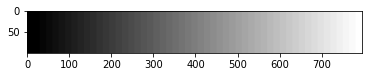

In [3]:
img = build_sample_image()
plt.imshow(img, cmap='gray');

# Simple Thresholding
- Binary<br>
![alt text](Files/Threshold/01Binary.JPG)

- Binary Inv<br>
![alt text](Files/Threshold/02BinaryInv.JPG)

- Trunc<br>
![alt text](Files/Threshold/03Trunc.JPG)

- To Zero<br>
![alt text](Files/Threshold/04ToZero.JPG)

- To Zero Inv<br>
![alt text](Files/Threshold/05ToZeroInv.JPG)

In [4]:
methods = ['THRESH_BINARY',
           'THRESH_BINARY_INV',
           'THRESH_TRUNC',
           'THRESH_TOZERO',
           'THRESH_TOZERO_INV',
           'THRESH_TRIANGLE']

In [5]:
img = cv2.imread('Files/rubik.jpg', 0)

In [6]:
img = build_sample_image()
cv2.namedWindow('Image')

cv2.createTrackbar('low', 'Image', 0, 255, nothing)
cv2.createTrackbar('high', 'Image', 0, 255, nothing)
cv2.createTrackbar('method', 'Image', 0, 5, nothing)

font = cv2.FONT_HERSHEY_SIMPLEX

while (1):
    low = cv2.getTrackbarPos('low','Image')
    high = cv2.getTrackbarPos('high','Image')
    method = cv2.getTrackbarPos('method','Image')
    
    if (method == 0):
        ret1, out = cv2.threshold(img, low, high, cv2.THRESH_BINARY)
    elif (method == 1):
        ret1, out = cv2.threshold(img, low, high, cv2.THRESH_BINARY_INV)
    elif (method == 2):
        ret1, out = cv2.threshold(img, low, high, cv2.THRESH_TRUNC)
    elif (method == 3):
        ret1, out = cv2.threshold(img, low, high, cv2.THRESH_TOZERO)
    elif (method == 4):
        ret1, out = cv2.threshold(img, low, high, cv2.THRESH_TOZERO_INV)
    elif (method == 5):
        ret1, out = cv2.threshold(img, low, high, cv2.THRESH_TRIANGLE)
    else:
        out = img.copy()
    cv2.putText(out,
                methods[method],
                (2,23),
                font,
                1,
                (125, 0, 0),
                2,
                cv2.LINE_AA)
    
    cv2.imshow('Image', out)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()

# Adaptive Thresholding
- MEAN
- GAUSSIAN

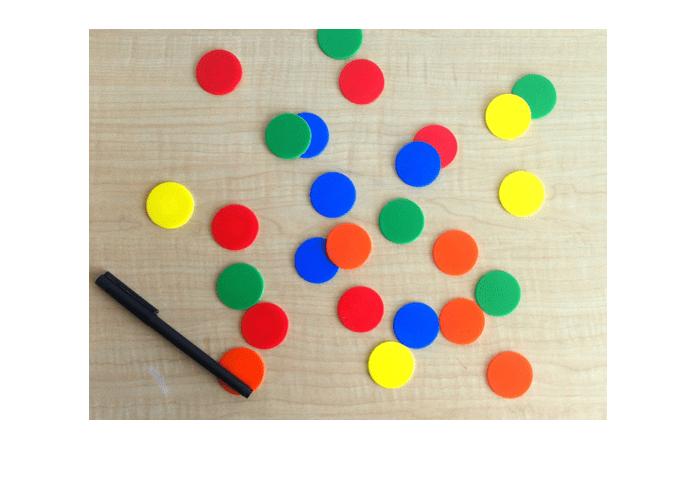

In [10]:
methods = ['ADAPTIVE_THRESH_MEAN',
           'ADAPTIVE_THRESH_GAUSSIAN_C'
          ]

img = cv2.imread('Files/Threshold/circles.png')
SHOW(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def nothing(x):
    pass

cv2.namedWindow('Image')

cv2.createTrackbar('x', 'Image', 1, 255, nothing)
cv2.createTrackbar('y', 'Image', 1, 255, nothing)
cv2.createTrackbar('method', 'Image', 0, 1, nothing)

font = cv2.FONT_HERSHEY_SIMPLEX

while (1):
    x = cv2.getTrackbarPos('x','Image')
    
    if (x%2 == 0):
        x += 1
    if (x < 3):
        x = 3

    y = cv2.getTrackbarPos('y','Image')
    method = cv2.getTrackbarPos('method','Image')
    
    if (method == 0):
        out = cv2.adaptiveThreshold(img,
                                    255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY,
                                    x,
                                    y)
    elif (method == 1):
        out = cv2.adaptiveThreshold(img,
                                    255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY,
                                    x,
                                    y)
    else:
        out = img.copy()
    
    cv2.putText(out,
                methods[method],
                (2,23),
                font,
                1,
                (125, 0, 0),
                2,
                cv2.LINE_AA)
    
    cv2.imshow('Image', out)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()